In [ ]:
#from huggingface_hub import hf_hub_download

In [ ]:
#hf_hub_download(repo_id = "merve/sam2-hiera-tiny", filename="sam2_hiera_tiny.pt", local_dir = "./")

In [4]:
from PIL import Image, ImageDraw
import numpy as np
from svg.path import parse_path

In [5]:
def svg_path_to_mask(path_data, width, height):
    # Create a blank image with a white background
    img = Image.new('L', (width, height), 0)
    draw = ImageDraw.Draw(img)
    
    # Parse the path
    parsed_path = parse_path(path_data)
    
    # Extract path points
    points = []
    for segment in parsed_path:
        if hasattr(segment, 'point'):
            start = segment.start
            end = segment.end
            points.append((start.real, start.imag))
            points.append((end.real, end.imag))
    
    # Draw the polygon on the image
    draw.polygon(points, fill=1, outline=1)
    
    # Convert the image to a NumPy array
    mask = np.array(img)
    return mask

In [6]:
# Example usage
path = 'M81.64000651041667,26.166666666666668L71.50667317708333,29.9L63.506673177083336,36.833333333333336L58.17333984375,47.5L51.24000651041667,76.3L52.30667317708333,86.43333333333334L60.30667317708333,101.36666666666666L61.37333984375,104.56666666666666L64.04000651041666,107.23333333333333L67.77333984375,110.96666666666667L81.10667317708334,115.23333333333333L89.64000651041667,114.7L101.90667317708333,67.23333333333333L103.50667317708333,53.36666666666667L96.04000651041666,29.9L93.37333984375,27.766666666666666L88.04000651041666,25.633333333333333L83.77333984375,25.633333333333333Z'
width, height = 200, 200
mask = svg_path_to_mask(path, width, height)

# The mask now contains a binary 2D array
print(mask)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


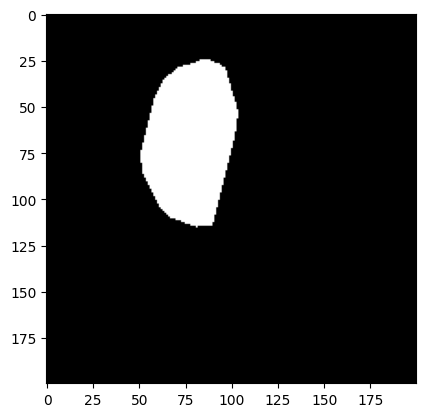

In [8]:
#plot the mask
import matplotlib.pyplot as plt

plt.imshow(mask, cmap='gray')